## Beautiful Demo

Loads training data and shows an example training face

In [1]:
from matplotlib import pyplot as plt
from read_data import training_validation

from time import time
from random import choice

(training_images, training_labels), (test_images, test_labels) = training_validation()

sample_image_positive = choice(training_images)
sample_image_negative = choice(test_images)

fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.imshow(sample_image_positive)
ax2.imshow(sample_image_negative)
plt.show()



reading csv: 4.285706043243408
formatting to numpy matrices: 4.028249025344849
picking random data: 0.00835108757019043
Formatting data: 2.7179718017578125e-05


## Example of feature selection used

16300.0
195630.0
49532.0
316175.0
219998.0


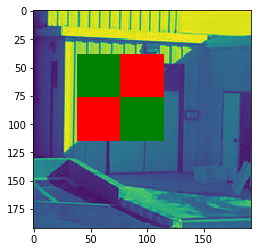

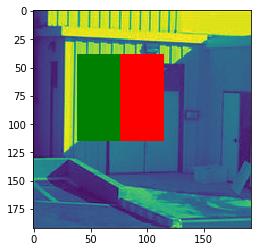

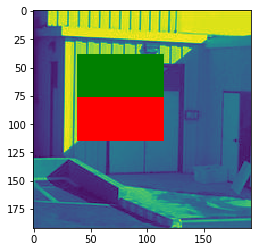

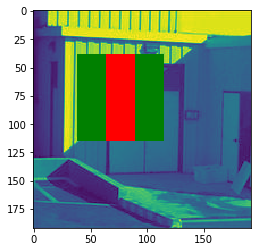

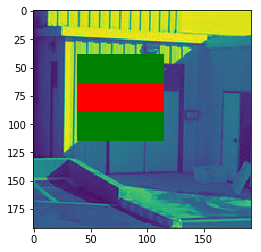

In [2]:
from features import *
from processing import IntegralImage

fsize = FeatureSize(0.2, 0.2, 0.4, 0.4)
ii = IntegralImage(sample_image_positive)
ii.process()

f = Feature(fsize, A)
fig, ax1 = plt.subplots(1, 1)
f.print_feature(ii, ax1)
print(f.calculate(ii))

f = Feature(fsize, B1)
fig, ax1 = plt.subplots(1, 1)
f.print_feature(ii, ax1)
print(f.calculate(ii))

f = Feature(fsize, B2)
fig, ax1 = plt.subplots(1, 1)
f.print_feature(ii, ax1)
print(f.calculate(ii))

f = Feature(fsize, C1)
fig, ax1 = plt.subplots(1, 1)
f.print_feature(ii, ax1)
print(f.calculate(ii))

f = Feature(fsize, C2)
fig, ax1 = plt.subplots(1, 1)
f.print_feature(ii, ax1)
print(f.calculate(ii))


plt.show()

## Example of Feature Generation

In [3]:
from features import *
count = 0
for sz in generate_all_sizes():
    count += 1
print(count)

225


## Format training and test data

The format is adapted for the special ada boosted version, to extract features, therefore to train the normal bayes
we have to transpose the data to get image x features instead of features x images.

In [4]:
import processing
import features
import os
import pickle
from numpy import save, load




outTrain = None
outTest = None

training = None
test = None
IItraining = None
IItest = None
if not os.path.isfile("training_feature_matrix.npy"):
    all_features = features.generate_all_features()
    
    print("Stage 1")
    IItraining = processing.bulk_II(training_images)
    IItest = processing.bulk_II(test_images)
    
    outTrain = open('IITraining.pkl', 'wb')
    outTest = open('IITesting.pkl', 'wb')
    pickle.dump(IItraining, outTrain)
    pickle.dump(IItest, outTest)
    outTrain.close()
    outTest.close()
    
    print("Stage 2")
    training = features.get_feature_matrix(IItraining, all_features)
    test = features.get_feature_matrix(IItest, all_features)

    """ _ is same as above. """

    save("training_feature_matrix", training)
    save("test_feature_matrix", test)
else:
    training = load("training_feature_matrix.npy")
    test = load("test_feature_matrix.npy")
    outTrain = open('IITraining.pkl', 'rb')
    outTest = open('IITesting.pkl', 'rb')
    IItraining = pickle.load(outTrain)
    IItest = pickle.load(outTest)
    outTrain.close()
    outTest.close()
    



## Display of Integral Image

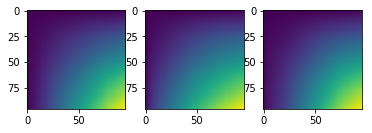

In [5]:

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax1.imshow(IItraining[0].ii)
ax2.imshow(IItraining[200].ii)
ax3.imshow(IItraining[400].ii)

plt.show()


## Testing Naive Bayes 

Naive bayes based on Normal distribution

Training a nb classifier


Training done.
950
Success rate: 0.8221052631578948
False positives 0.16526315789473683
False negatives 0.01263157894736842


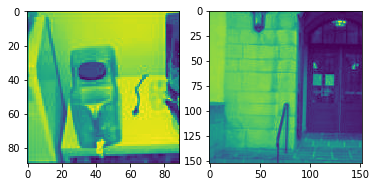

In [9]:
from naive_bayes import naive_bayes
from numpy import array, save
from sys import stdout

# Bayes is weak when there's to many features.
training_for_bayes = training[500:510].T
test_for_bayes = test[500:510].T


classifier = naive_bayes()
classifier.train(training_for_bayes, training_labels)

correct = 0
total = len(test_for_bayes)
print(total)

false_positive = None
false_negative = None

false_positives = 0
false_negatives = 0 
for index, image in enumerate(test_for_bayes):
    #stdout.write("\r\r\r" + str(index) + str("\r\r\r"))
    
    prediction = classifier.predict(image)
    label = test_labels[index]
    
    false_positives += (prediction == 1 and label == 0)
    false_negatives += (prediction == 0 and label == 1)
    
    if prediction == 1 and label == 0:
        false_positive = test_images[index]
    
    if prediction == 0 and label == 0:
        false_negative = test_images[index]
        
    correct += 1 if classifier.predict(image) == test_labels[index] else 0
    

fig, (fp, fn) = plt.subplots(1, 2)

fp.imshow(false_positive)
fn.imshow(false_negative)

print("Success rate: {}".format(correct / total))
print("False positives {}".format(false_positives / total))
print("False negatives {}".format(false_negatives / total))

plt.show()

In [ ]:
from cascade import cascade
from numpy import array

c = cascade(0.35, 0.7)
c.train(IItraining, array(training_labels), 0.05)